# Chapter2 Demonstration8

Data : ```w-gs1yr.txt```
       ```w-gs3yr.txt```

Page 93

In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Load the data
r1_data = pd.read_csv('./data/w-gs1yr.txt', delim_whitespace=True, header=0, index_col=[0,1,2])
r3_data = pd.read_csv('./data/w-gs3yr.txt', delim_whitespace=True,header=0, index_col=[0,1,2])

In [8]:
r1_data

rate
year mon day      
1962 1   5    3.24
         12   3.32
         19   3.29
         26   3.26
     2   2    3.29
...            ...
2009 3   13   0.70
         20   0.64
         27   0.59
     4   3    0.58
         10   0.60

[2467 rows x 1 columns]

In [9]:
r3_data

rate
year mon day      
1962 1   5    3.70
         12   3.75
         19   3.80
         26   3.77
     2   2    3.80
...            ...
2009 3   13   1.41
         20   1.28
         27   1.28
     4   3    1.22
         10   1.35

[2467 rows x 1 columns]

In [13]:
# Extract the fourth column which contains the interest rates
r1 = r1_data.iloc[:, 0]
r3 = r3_data.iloc[:, 0]

In [16]:
print(r1, r3)

year  mon  day
1962  1    5      3.24
           12     3.32
           19     3.29
           26     3.26
      2    2      3.29
                  ... 
2009  3    13     0.70
           20     0.64
           27     0.59
      4    3      0.58
           10     0.60
Name: rate, Length: 2467, dtype: float64 year  mon  day
1962  1    5      3.70
           12     3.75
           19     3.80
           26     3.77
      2    2      3.80
                  ... 
2009  3    13     1.41
           20     1.28
           27     1.28
      4    3      1.22
           10     1.35
Name: rate, Length: 2467, dtype: float64


In [19]:
# Perform linear regression of r3 on r1
X = sm.add_constant(r1)  # Adds a constant term to the predictor
m1 = sm.OLS(r3, X).fit()
X

const  rate
year mon day             
1962 1   5      1.0  3.24
         12     1.0  3.32
         19     1.0  3.29
         26     1.0  3.26
     2   2      1.0  3.29
...             ...   ...
2009 3   13     1.0  0.70
         20     1.0  0.64
         27     1.0  0.59
     4   3      1.0  0.58
         10     1.0  0.60

[2467 rows x 2 columns]

In [20]:
# Print the summary of the linear regression model
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:                   rate   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 6.781e+04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:45:09   Log-Likelihood:                -1899.6
No. Observations:                2467   AIC:                             3803.
Df Residuals:                    2465   BIC:                             3815.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8321      0.024     34.432      0.0

In [22]:
m1.resid

year  mon  day
1962  1    5     -0.143866
           12    -0.168229
           19    -0.090343
           26    -0.092457
      2    2     -0.090343
                    ...   
2009  3    13    -0.072820
           20    -0.147047
           27    -0.100570
      4    3     -0.151274
           10    -0.039865
Length: 2467, dtype: float64

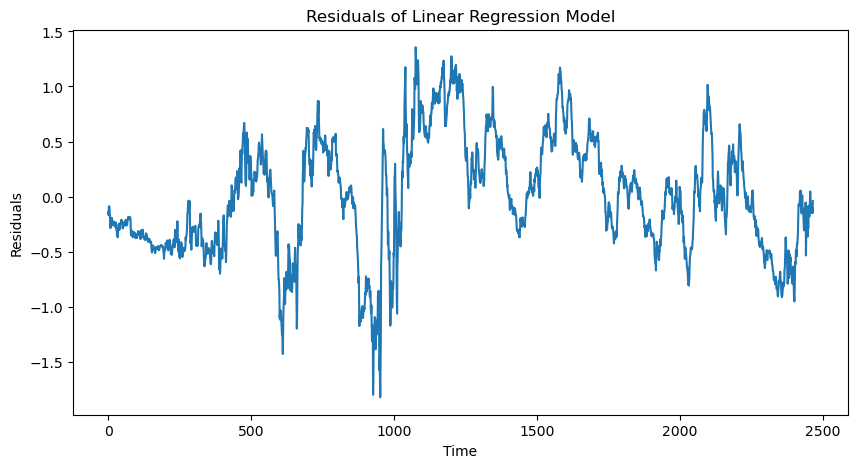

In [28]:
# Plot the residuals of the first model
plt.figure(figsize=(10, 5))
plt.plot(list(m1.resid))
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

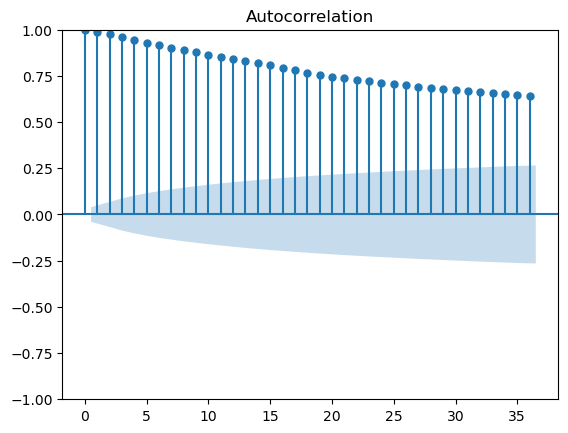

In [29]:
# Calculate the ACF of the residuals of the first model
plot_acf(list(m1.resid), lags=36)
plt.show()

In [33]:
# Perform linear regression on the differenced series
c1 = np.diff(r1)
c3 = np.diff(r3)
# Note: We cannot use sm.add_constant here because we are not including an intercept in the model
m2 = sm.OLS(c3, c1).fit()
# Print the summary of the linear regression model without intercept
print(m2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.825
Model:                            OLS   Adj. R-squared (uncentered):              0.825
Method:                 Least Squares   F-statistic:                          1.165e+04
Date:                Tue, 16 Jan 2024   Prob (F-statistic):                        0.00
Time:                        23:49:23   Log-Likelihood:                          3096.0
No. Observations:                2466   AIC:                                     -6190.
Df Residuals:                    2465   BIC:                                     -6184.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

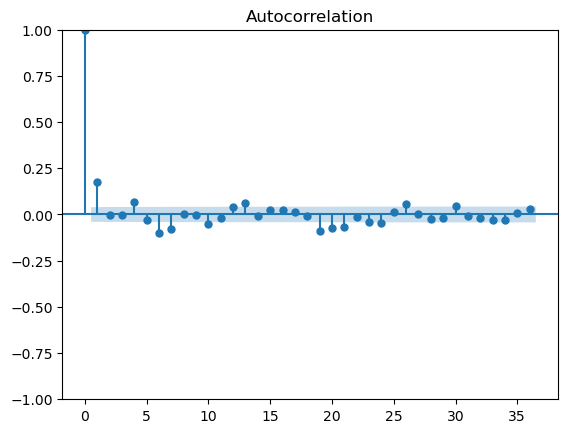

In [34]:
# Calculate the ACF of the residuals of the second model
plot_acf(m2.resid, lags=36)
plt.show()

In [35]:
# Fit an ARIMA model to the differenced 3-year rates with differenced 1-year rates as exogenous variable
m3 = ARIMA(c3, order=(0, 0, 1), exog=c1, trend='n').fit()
# Print the ARIMA model summary
print(m3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2466
Model:                 ARIMA(0, 0, 1)   Log Likelihood                3136.615
Date:                Tue, 16 Jan 2024   AIC                          -6267.231
Time:                        23:49:38   BIC                          -6249.800
Sample:                             0   HQIC                         -6260.898
                               - 2466                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7936      0.003    227.292      0.000       0.787       0.800
ma.L1          0.1824      0.013     13.699      0.000       0.156       0.208
sigma2         0.0046   7.66e-05     60.017      0.0

In [36]:
# Calculate the R-squared value
rsq = (np.sum(c3 ** 2) - np.sum(m3.resid ** 2)) / np.sum(c3 ** 2)
rsq

0.8310074720291265